# Лабораторная работа №1, Фундаментальные концепции ИИ
## Градиентный спуск и его модификации

### Попов Матвей, М8О-114СВ-24

Импортируем необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Пайплайн тестирования алгоритмов оптимизации

In [2]:
def plot_function(function, true_optimum, found_optimum, name):
    x = np.linspace(-4.5, 4.5, 100)
    y = np.linspace(-4.5, 4.5, 100)
    X, Y = np.meshgrid(x, y)
    Z = function(X, Y)

    true_z = function(*true_optimum)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.6)
    ax.scatter(*true_optimum, true_z, color='red', s=100, label="Analytical Optimum")
    
    for i, opt in enumerate(found_optimum):
        z = function(*opt)
        ax.scatter(opt[0], opt[1], z, color='blue', s=200, label=f"Found Optimum {i+1}")
    
    ax.set_title(name)
    ax.set_xlabel('X')
    ax.set_ylabel("Y")
    ax.set_zlabel("f(X, Y)")
    ax.legend()
    
    plt.show()

def calculate_points_and_error(optimization_function, gradient, true_optimum, start_points, learning_rate=0.001, iterations=10000):
    true_optimum = np.array(true_optimum)
    found_points = []
    errors = []

    for start in start_points:
        found_optimum = optimization_function(gradient, start, learning_rate, iterations)
        found_points.append(found_optimum)
        error = np.linalg.norm(found_optimum - true_optimum)
        errors.append(error)

    average_error = np.mean(errors)
    return found_points, average_error


## Тестовые функции оптимизации

### Функция Била

In [3]:
def beale_function(x, y):
    return (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2

def beale_gradient(x, y):
    df_dx = 2 * (1.5 - x + x * y) * (-1 + y) + \
            2 * (2.25 - x + x * y**2) * (-1 + y**2) + \
            2 * (2.625 - x + x * y**3) * (-1 + y**3)
    
    df_dy = 2 * (1.5 - x + x * y) * x + \
            2 * (2.25 - x + x * y**2) * (2 * x * y) + \
            2 * (2.625 - x + x * y**3) * (3 * x * y**2)
    
    return np.array([df_dx, df_dy])

beale_true_optimum = [3, 0.5]
beale_start_points = [[1.,1.], [1.,2.], [1.,-2.]]


**Визуализация функции и точки оптимума**

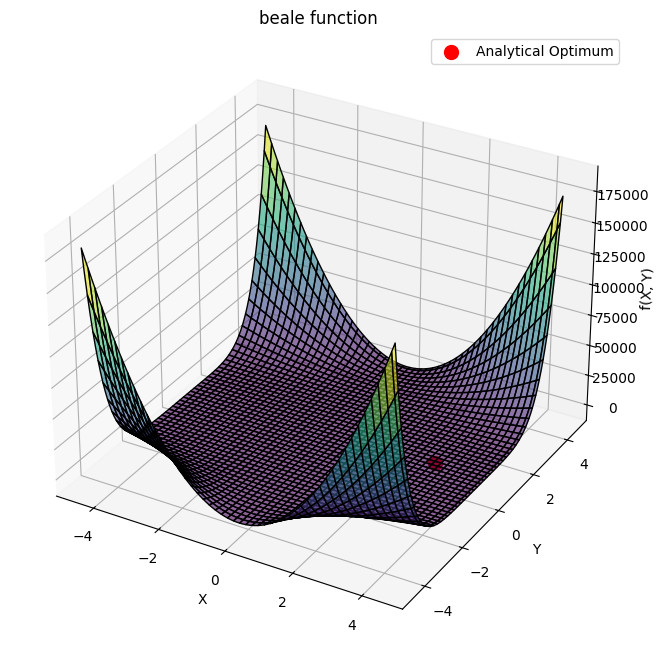

In [4]:
plot_function(beale_function, beale_true_optimum, [], 'beale function')

### Функция Бута

In [5]:
def booth_function(x, y):
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

def booth_gradient(x, y):
    dfdx = 2 * (x + 2*y - 7) + 4 * (2*x + y - 5)
    dfdy = 4 * (x + 2*y - 7) + 2 * (2*x + y - 5)
    return np.array([dfdx, dfdy])

booth_true_optimum = [1, 3]
booth_start_points = [[1.,1.], [1.,2.], [1.,-2.]]


**Визуализация функции и точки оптимума**

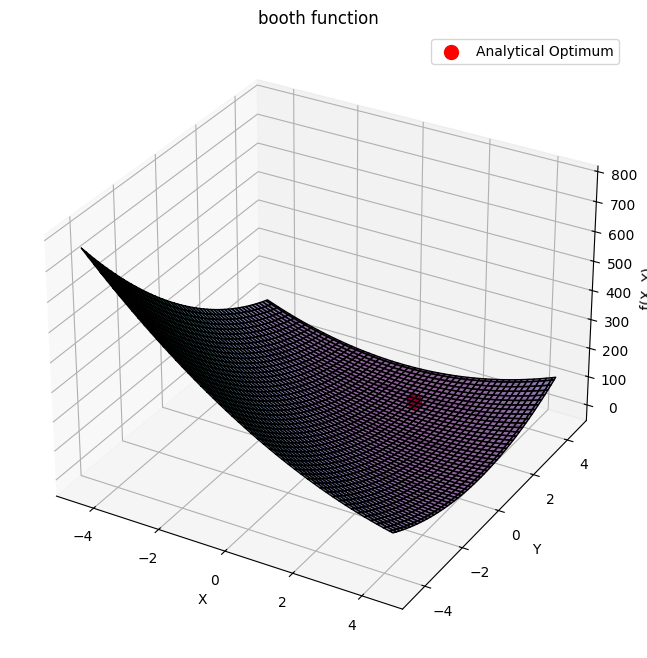

In [6]:
plot_function(booth_function, booth_true_optimum, [], 'booth function')

## Классический градиентный спуск

In [7]:
def gradient_descent(gradient, start_point, learning_rate, iterations):
    point = np.array(start_point, dtype='float64')
    for _ in range(iterations):
        grad = gradient(point[0], point[1])
        point = point - learning_rate * grad
    return point


### Вычисление погрешности найденного решения в сравнении с аналитическим для нескольких запусков

**Функция Била**

In [8]:
beale_found_points, beale_average_error = calculate_points_and_error(gradient_descent, beale_gradient, beale_true_optimum, beale_start_points)

print(f"Погрешность: {beale_average_error}")

Погрешность: 0.019386182616305356


**Функция Бута**

In [9]:
booth_found_points, booth_average_error = calculate_points_and_error(gradient_descent, booth_gradient, booth_true_optimum, booth_start_points)

print(f"Погрешность: {booth_average_error}")

Погрешность: 3.809486338130428e-09


### Визуализация точки найденного решения

**Функция Била**

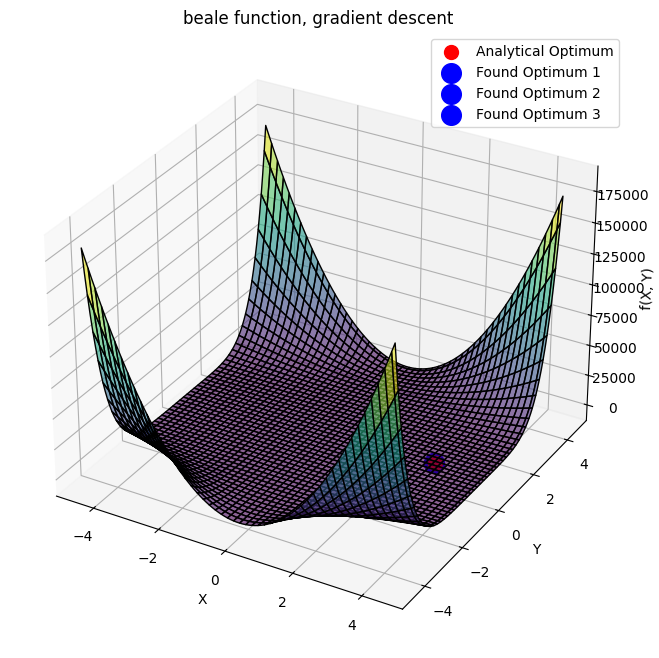

In [10]:
plot_function(beale_function, beale_true_optimum, beale_found_points, 'beale function, gradient descent')

**Функция Бута**

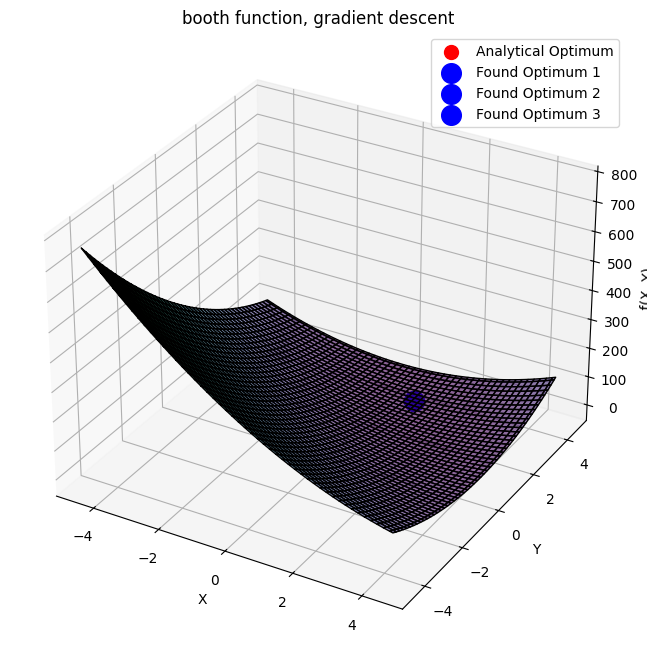

In [11]:
plot_function(booth_function, booth_true_optimum, booth_found_points, 'booth function, gradient descent')

## Моментная модификация

In [12]:
def momentum_gradient_descent(gradient, start_point, learning_rate, iterations, momentum=0.9):
    point = np.array(start_point, dtype='float64')
    velocity = np.zeros_like(point)
    
    for _ in range(iterations):
        grad = gradient(point[0], point[1])
        velocity = momentum * velocity - learning_rate * grad
        point = point + velocity
    
    return point


### Вычисление погрешности найденного решения в сравнении с аналитическим для нескольких запусков

**Функция Била**

In [13]:
beale_found_points, beale_average_error = calculate_points_and_error(momentum_gradient_descent, beale_gradient, beale_true_optimum, beale_start_points)

print(f"Погрешность: {beale_average_error}")

Погрешность: 7.092544029595208e-14


**Функция Бута**

In [14]:
booth_found_points, booth_average_error = calculate_points_and_error(momentum_gradient_descent, booth_gradient, booth_true_optimum, booth_start_points)

print(f"Погрешность: {booth_average_error}")

Погрешность: 7.707858776888524e-15


### Визуализация точки найденного решения

**Функция Била**

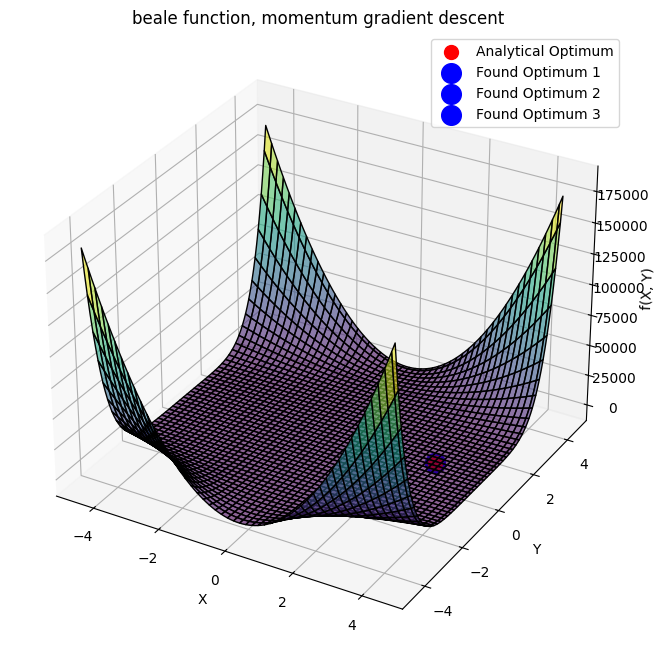

In [15]:
plot_function(beale_function, beale_true_optimum, beale_found_points, 'beale function, momentum gradient descent')

**Функция Бута**

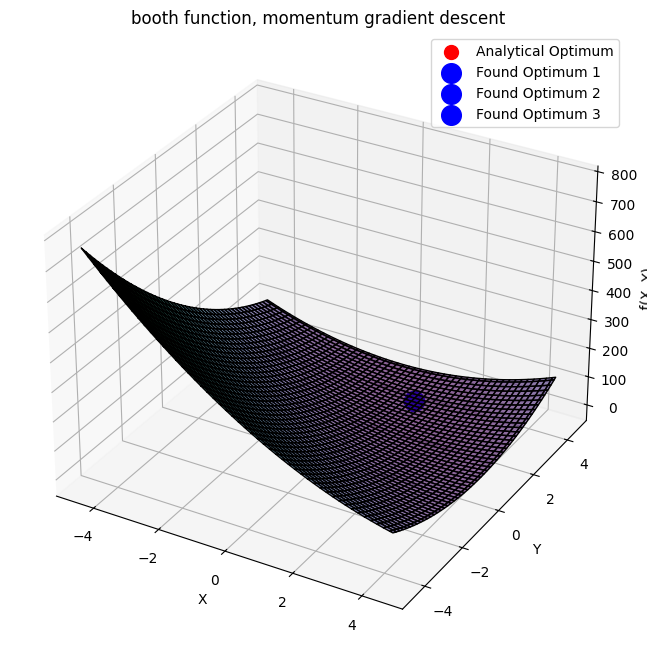

In [16]:
plot_function(booth_function, booth_true_optimum, booth_found_points, 'booth function, momentum gradient descent')

## Адаптивная модификация

In [17]:
def adagrad(gradient, start_point, learning_rate, iterations, epsilon=1e-8):
    point = np.array(start_point, dtype='float64')
    gradient_square_accum = np.zeros_like(point)
    
    for _ in range(iterations):
        grad = gradient(point[0], point[1])
        gradient_square_accum += grad**2
        adjusted_grad = grad / (np.sqrt(gradient_square_accum) + epsilon)
        point = point - learning_rate * adjusted_grad
    
    return point


### Вычисление погрешности найденного решения в сравнении с аналитическим для нескольких запусков

**Функция Била**

In [18]:
beale_found_points, beale_average_error = calculate_points_and_error(adagrad, beale_gradient, beale_true_optimum, beale_start_points)

print(f"Погрешность: {beale_average_error}")

Погрешность: 2.497754940581817


**Функция Бута**

In [19]:
booth_found_points, booth_average_error = calculate_points_and_error(adagrad, booth_gradient, booth_true_optimum, booth_start_points)

print(f"Погрешность: {booth_average_error}")

Погрешность: 2.4867819614095468


### Визуализация точки найденного решения

**Функция Била**

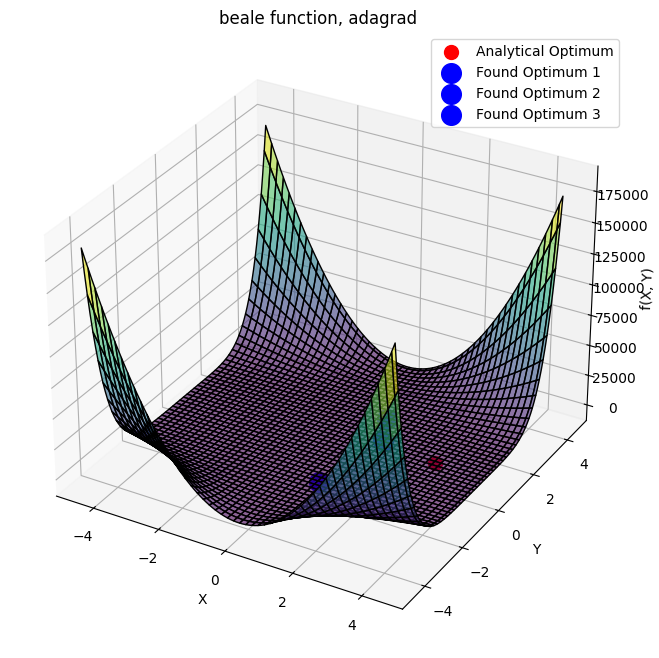

In [20]:
plot_function(beale_function, beale_true_optimum, beale_found_points, 'beale function, adagrad')

**Функция Бута**

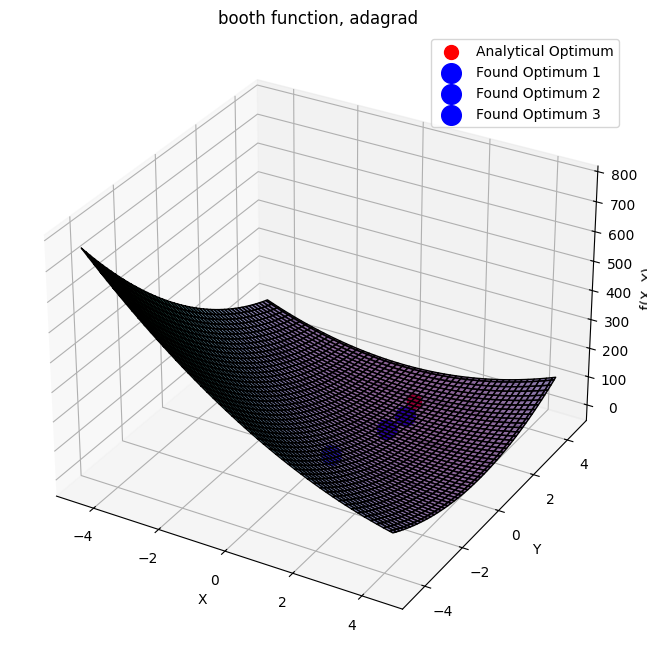

In [21]:
plot_function(booth_function, booth_true_optimum, booth_found_points, 'booth function, adagrad')

## Метод эволюции темпа обучения

Совместно с моментным градиентным спуском


In [22]:
def momentum_gradient_descent_with_decay(gradient, start_point, learning_rate, iterations, momentum=0.9, decay_rate=0.99):
    point = np.array(start_point, dtype='float64')
    velocity = np.zeros_like(point)
    
    for t in range(iterations):
        lr_t = learning_rate * (decay_rate ** t)
        
        grad = gradient(point[0], point[1])
        
        velocity = momentum * velocity - lr_t * grad
        point = point + velocity
    
    return point


### Вычисление погрешности найденного решения в сравнении с аналитическим для нескольких запусков

**Функция Била**

In [23]:
beale_found_points, beale_average_error = calculate_points_and_error(momentum_gradient_descent_with_decay, beale_gradient, beale_true_optimum, beale_start_points)

print(f"Погрешность: {beale_average_error}")

Погрешность: 0.6430400866946526


**Функция Бута**

In [24]:
booth_found_points, booth_average_error = calculate_points_and_error(momentum_gradient_descent_with_decay, booth_gradient, booth_true_optimum, booth_start_points)

print(f"Погрешность: {booth_average_error}")

Погрешность: 0.2032781572593331


### Визуализация точки найденного решения

**Функция Била**

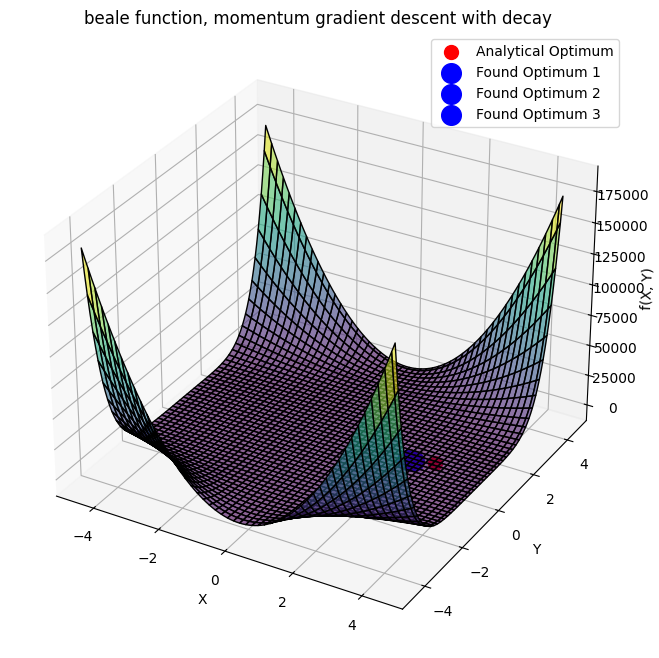

In [25]:
plot_function(beale_function, beale_true_optimum, beale_found_points, 'beale function, momentum gradient descent with decay')

**Функция Бута**

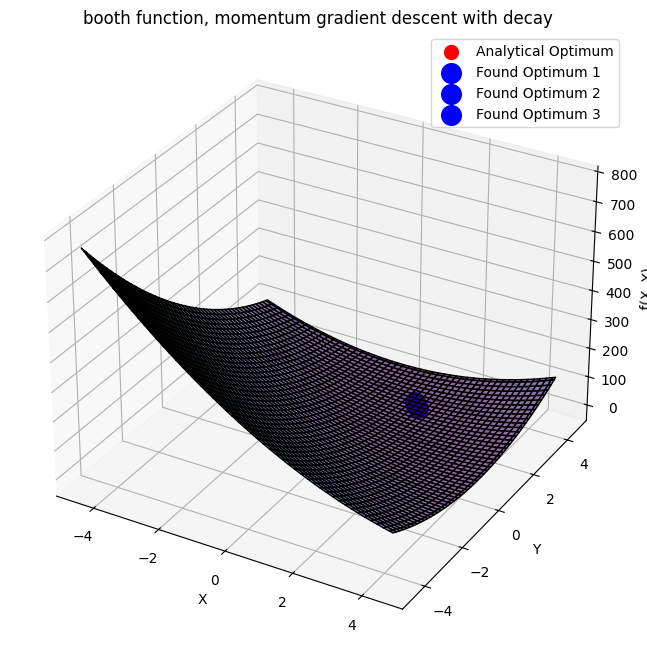

In [26]:
plot_function(booth_function, booth_true_optimum, booth_found_points, 'booth function, momentum gradient descent with decay')

## Вывод

Проделав лабораторную работу, реализовал 4 модификации градиентного спуска и 
протестировал их на функциях Била и Бута. Лучше всего себя показала моментная 
модификация, хуже всего себя показала адаптивная модификация.
